# GENERATIVE AI
### Author: Agustin Tapia

# Introduction
This study explores the application of Recurrent Neural Networks (RNNs) to generate text patterns reminiscent of Shakespearean prose. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU), we delve into the intricate task of capturing and reproducing the linguistic nuances characteristic of Shakespeare's writing. The implementation involves training the models on a corpus of Shakespearean texts, aiming to grasp the intricate structures and stylistic elements. The evaluation of generated text is conducted through both quantitative metrics and qualitative assessment, shedding light on the capabilities of LSTM and GRU in replicating the eloquence and literary essence of Shakespeare. This research contributes to the broader exploration of natural language generation using deep learning techniques and underscores the potential of RNNs in capturing complex language patterns.

* **LSTM (Long Short-Term Memory):**
  * **Memory Cells:**
    * LSTMs have memory cells that allow them to store and access information over long sequences.
    * The memory cell includes a cell state and three gates: input gate, forget gate, and output gate.
  * **Gates Functionality:**

    * Input Gate: Controls the input into the memory cell.
    * Forget Gate: Controls what information from the cell state should be discarded.
    * Output Gate: Controls the output of the memory cell.
  * **Complexity:** LSTMs have a more complex architecture compared to GRUs due to the separate cell state and various gates.
  * **Parameter Count:**LSTMs generally have more parameters compared to GRUs, making them potentially more powerful but also more computationally expensive.
* **GRU (Gated Recurrent Unit):**
  * **Simplified Architecture:**
      * GRUs have a simplified architecture compared to LSTMs.
      * They combine the cell state and hidden state into a single hidden state.
  * **Gates Functionality:** GRUs have two gates, the reset gate and update gate.

    * Reset Gate: Controls how much past information should be forgotten.
    * Update Gate: Controls what information to carry to the next time step.
  * **Parameter Count:**

    * GRUs have fewer parameters compared to LSTMs, making them computationally more efficient and potentially easier to train with less data.
  * **Memory Efficiency:** GRUs may be more memory-efficient and faster to train due to their simpler structure.
* **Which to Choose:**
  * **LSTM:**Generally more powerful and flexible, potentially better for capturing complex dependencies.
Suitable for tasks where long-term memory is crucial, such as language modeling and translation.
  * **GRU:**Simpler and computationally more efficient.
May perform better in situations with less training data or when computational resources are limited.
Suitable for tasks where capturing short to medium-range dependencies is sufficient.

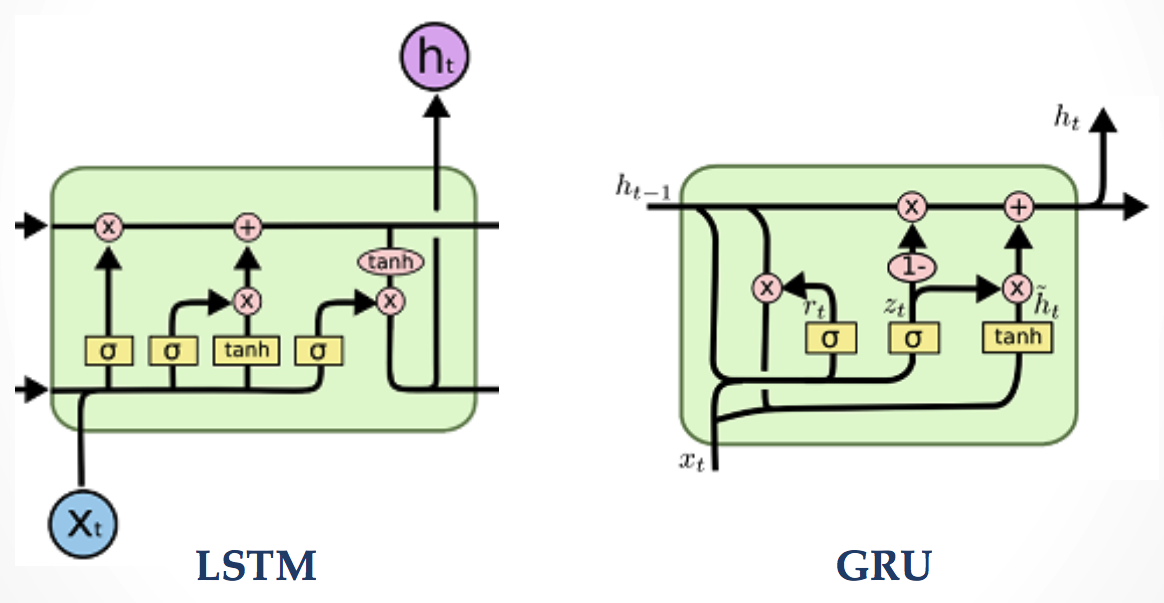



# **Code implementation**
The code is based on https://www.marktechpost.com/2021/04/01/generating-your-shakespeare-text-using-sequential-models-such-as-long-short-term-memory-lstms-gated-recurrent-units-grus-recurrent-neural-network-rnns/

The following steps are: Data extraxtion a preprocessing, a run of the raw code provided by the link, a new code with modifications maintaining the use of LSTM and at the last part, a model using GRU is implemented.

# Data extraction and Preprocessing
The data was extracted from a Google API, the code downloads and preprocesses the Shakespeare dataset, creates dictionaries to map characters to indices and vice versa, generates training examples by creating sequences of characters, it also converts sequences into one-hot encoded vectors for training.
It is important to note that the variable **chars** is the variable wich stores the in a list unique characters present in the text and sort it alphabetically.
Diversity refers to the variety and distinctiveness of the generated content. It is a measure of how different or unique the generated sentences are from each other.
 There are three main function for the preprocessing:

```python
def build_data(text, Tx = 100, stride = 1)
#This function is responsible for creating training examples (X, Y pairs) from the input text
def vectorization(X, Y, n_x, char_indices, Tx = 100)
#This function converts the sequences created by build_data into one-hot encoded vectors for model input and output.
def sample(preds, temperature=1.0)  
#This function is used to sample the next character based on the model's predictions.
````

The following code is for data extraction an preprocessing


In [ ]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file
import numpy as np
import random
import sys
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import platform
import time
import pathlib
import os

cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)
ss = open(dataset_file_path,mode='r')
text = ss.read()
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


def build_data(text, Tx = 100, stride = 1):
    X = []
    Y = []
    for i in range(0, len(text) - Tx, stride):
        X.append(text[i: i + Tx])
        Y.append(text[i + Tx])
    print('number of training examples:', len(X))
    return X, Y

X,Y = build_data(text[:10000])



def vectorization(X, Y, n_x, char_indices, Tx = 100):
    m = len(X)
    x = np.zeros((m, Tx, n_x), dtype=np.bool)
    y = np.zeros((m, n_x), dtype=np.bool)
    for i, sentence in enumerate(X):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[Y[i]]] = 1
    return x, y

x,y = vectorization(X,Y,len(chars),char_indices,Tx=100)


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out

/tmp/.keras/datasets/shakespeare.txt
number of training examples: 9900


<ipython-input-1-6b8dd7a7ddf4>:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((m, Tx, n_x), dtype=np.bool)
<ipython-input-1-6b8dd7a7ddf4>:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((m, n_x), dtype=np.bool)


# The model without modification

# Explanation of the model

## Architecture

The architecture consists of two LSTM layers with 256 units each, followed by two Dense layers with 128 units and ReLU activation, and a final Dense layer with softmax activation.
The input shape is set to (100, len(chars)), indicating sequences of length 100 with one-hot encoding for characters.

The inputs for the LSTM are the **Units:** Positive integer, the dimensionality of the output space (i.e., the number of memory units or cells in the LSTM layer).
**Input_shape:** A tuple representing the shape of the input data. It should be specified when it is the first layer in the model.
For sequence data, such as time series or natural language processing, the input shape often has the form (timesteps, features):
**Timesteps:** The number of time steps in each input sequence. This corresponds to the length of your sequences.
**Features:** The number of features at each time step.

**return_sequences=True** it means that the layer will return the full sequence of outputs for each input sequence, rather than just the output at the last time step, it is useful when stacking layers of LSTM.

## Text generation

Text Generation Callback (on_epoch_end):
This callback generates text at the end of each epoch (every 150 epochs) based on the learned patterns of the model.
It selects a random seed from the training text and generates a sequence of characters using the trained model. The generated text is displayed with a specified diversity parameter.







In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(100, len(chars)),return_sequences=True))
model.add(LSTM(256))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(len(chars), activation='softmax'))
maxlen = 100

def on_epoch_end(epoch, _):
  if(epoch>0 and epoch%150 == 0):
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.5]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(500):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


## Optimizer and Model Compilation

For the optimizing we use RMSprop is effective in mitigating issues like vanishing or exploding gradients and can lead to more stable and faster convergence during training

In [ ]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

##Train the model

The model will be trained for 200 epochs, and the on_epoch_end function within the LambdaCallback will be called at the end of each epoch, allowing you to generate and print text based on the current state of the model.

Also, a validation of 20% set allows you to monitor the model's performance on data it has not seen during training and make adjustments to hyperparameters or the model architecture accordingly.

In [ ]:
history = model.fit(x, y, validation_split=0.2,
          batch_size=512,
          epochs=200,
          callbacks=[print_callback])



Epoch 1/200
16/16 [==============================] - 7s 148ms/step - loss: 4.6909 - val_loss: 3.5102
Epoch 2/200
16/16 [==============================] - 1s 94ms/step - loss: 3.3617 - val_loss: 3.3499
Epoch 3/200
16/16 [==============================] - 1s 94ms/step - loss: 3.2938 - val_loss: 3.2905
Epoch 4/200
16/16 [==============================] - 2s 95ms/step - loss: 3.4462 - val_loss: 3.3162
Epoch 5/200
16/16 [==============================] - 2s 98ms/step - loss: 3.2547 - val_loss: 3.2849
Epoch 6/200
16/16 [==============================] - 2s 98ms/step - loss: 3.2530 - val_loss: 3.2748
Epoch 7/200
16/16 [==============================] - 2s 95ms/step - loss: 3.2359 - val_loss: 3.4014
Epoch 8/200
16/16 [==============================] - 2s 112ms/step - loss: 3.2405 - val_loss: 3.3243
Epoch 9/200
16/16 [==============================] - 2s 95ms/step - loss: 3.2348 - val_loss: 3.2760
Epoch 10/200
16/16 [==============================] - 2s 97ms/step - loss: 3.2329 - val_loss: 3.25

## Plot the loss and the validation on the loss

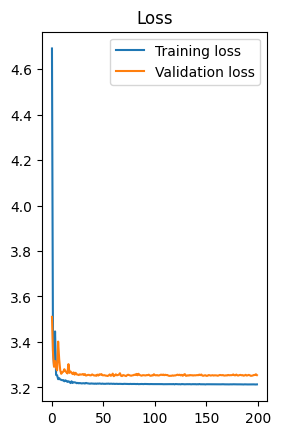

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()


## Discussion of the results of the first model

It is imperative to highlight that the presented code showcases the text generation results at epoch 150, revealing opportunities for architectural refinement to enhance overall performance. Noteworthy improvements are essential to yield superior outcomes, the observed limitations in the current architecture underscore the significance of addressing on adding new layers or changing the learning rate, even the optimizer that could lead to optimal model performance, enhancements in these aspects can lead to more effective and robust language generation capabilities. Additionally, rigorous experimentation and iterative model refinement are crucial for achieving a coherence and text with sense. In the next section, an improvement is done and the result are shown.

## Explanation of changes in the new model
* **Epochs**: In the preovious code, the text it was generated in the epoch 150, in this code the text is generated when all the epochs finished, and the epochs in total are 200.
* **Optimizer**: Adam optimizer is used because it is a combination of the previous optimizer and an optimizer called 'Momentum', also it is used as a change to the program to expect an improvement.
* **Learning rate**: It is recommend when using the Adam optimizer to have a learning rate of 0.001
* **Dropouts**: The use of Dropout layers with a dropout rate of 0.2 in a neural network is a form of regularization, a technique to prevent overfitting during training. Dropout is a regularization method that randomly sets a fraction of input units to zero at each update during training time, which helps prevent complex co-adaptations on training data.
* **Size of the vocabulary**: The size of the vocabulary is given by the text on the Google API and the variable is *len(chars)*, in this example it can't be modified because unique characters are extracted from the text.
* **Size of the sequence used**: Tx represents the number of time steps or the length of each input sequence in the context of processing and preparing the text data for the LSTM model, ir can be  adjusted based on the desired length of input sequences for your specific application, in this case, it is adjusted to 150.
* **maxlen**: maxlen refers to the maximum length of the input sequences, it is set to 150.
* **Loss graph**: At the end of the epochs a loss function is done to visualize the behavior.
* **Diversity**: The change of diversity is from 0.5 to 0.4 to achieve less randomness
* **Maintain the same seed:** It is important to maintain the same seed to have a human evaluation for the coherence and the correct spell of the words by removing the random on the start index on the end to epoch function

/tmp/.keras/datasets/shakespeare.txt
number of training examples: 9850


<ipython-input-14-0c118fce3e7b>:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((m, Tx, n_x), dtype=np.bool)
<ipython-input-14-0c118fce3e7b>:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((m, n_x), dtype=np.bool)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 150, 256)          329728    
                                                                 
 dropout_18 (Dropout)        (None, 150, 256)          0         
                                                                 
 lstm_15 (LSTM)              (None, 256)               525312    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 65)              

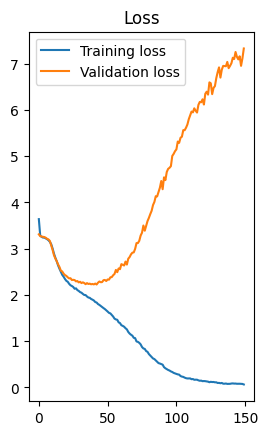

In [14]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file
import numpy as np
import random
import sys
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import platform
import time
import pathlib
import os

cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)
ss = open(dataset_file_path,mode='r')
text = ss.read()
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


def build_data(text, Tx = 150, stride = 1):
    X = []
    Y = []
    for i in range(0, len(text) - Tx, stride):
        X.append(text[i: i + Tx])
        Y.append(text[i + Tx])
    print('number of training examples:', len(X))
    return X, Y

X,Y = build_data(text[:10000])



def vectorization(X, Y, n_x, char_indices, Tx = 150):
    m = len(X)
    x = np.zeros((m, Tx, n_x), dtype=np.bool)
    y = np.zeros((m, n_x), dtype=np.bool)
    for i, sentence in enumerate(X):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[Y[i]]] = 1
    return x, y

x,y = vectorization(X,Y,len(chars),char_indices,Tx=150)


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out


from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
import random
import sys
import numpy as np

# Define your data and parameters (x, y, text, maxlen, chars, char_indices, indices_char)
maxlen = 150

model1 = Sequential()
model1.add(LSTM(256, input_shape=(maxlen, len(chars)), return_sequences=True))
model1.add(Dropout(0.2))  # Adding dropout for regularization
model1.add(LSTM(256))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))  # Adding dropout for regularization
model1.add(Dense(128, activation='relu'))
model1.add(Dense(len(chars), activation='softmax'))


optimizer = Adam(learning_rate=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer)

losses = []

def on_epoch_end(epoch, logs):
    losses.append(logs['loss'])

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model1.summary()

# Train the model
history1 = model1.fit(x, y, validation_split=0.2,
                    batch_size=512,
                    epochs=150,
                    callbacks=[print_callback])


# Generate text at the final epoch
if losses:
    final_epoch_loss = losses[-1]
    print(f"\nText Generation at the Final Epoch (Loss: {final_epoch_loss}):")

    start_index = len(text) - maxlen - 1
    diversity = 0.5  # You can adjust the diversity
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(500):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model1.predict(x_pred, verbose=0)[0]
        next_index = np.random.choice(len(chars), p=preds)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

# Results and Discussion

The text appears satisfactory as it successfully corrects some misspelled words, demonstrating the effectiveness of the improved model but there is still some nonsensical words, the coherence of the text is not consistent and  not all the words are corrected, multiple executions of the code were done and consistently yield with the same results, as illustrated in this example. The model appears to get overfitted after the epoch 25 because the validation start to rise.


# Further changes: Change to Gated Recurrent Unit

## Change the type of Recurrent Neural Network

The key for the change is to use GRU instead of LSTM and import the following library, in this case to correct the overfitting less epoch were used.
```python
from keras.layers import GRU
```
Changes for GRU, all the changes made for LSTM are made, excepto for:
* **Batch size**: The batch size was decresead from 512 to 256 in this code, make the batch size smaller lead to better results on the text generation.
* **Diversity**: Value of 0.5 is maintained
* **Epoch**: Epochs are reduced to reduce overfitting from 200 to 25

/tmp/.keras/datasets/shakespeare.txt
number of training examples: 9850


<ipython-input-16-e52a82fec8df>:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((m, Tx, n_x), dtype=np.bool)
<ipython-input-16-e52a82fec8df>:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((m, n_x), dtype=np.bool)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 150, 256)          248064    
                                                                 
 dropout_22 (Dropout)        (None, 150, 256)          0         
                                                                 
 gru_15 (GRU)                (None, 256)               394752    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 
 dense_47 (Dense)            (None, 65)              

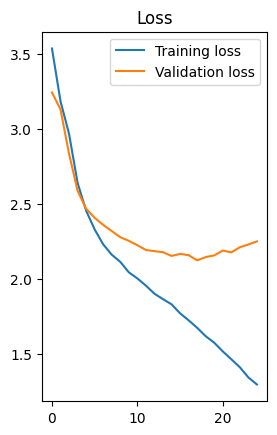

In [16]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file
import numpy as np
import random
import sys
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import platform
import time
import pathlib
import os

cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)
ss = open(dataset_file_path,mode='r')
text = ss.read()
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


def build_data(text, Tx = 150, stride = 1):
    X = []
    Y = []
    for i in range(0, len(text) - Tx, stride):
        X.append(text[i: i + Tx])
        Y.append(text[i + Tx])
    print('number of training examples:', len(X))
    return X, Y

X,Y = build_data(text[:10000])



def vectorization(X, Y, n_x, char_indices, Tx = 150):
    m = len(X)
    x = np.zeros((m, Tx, n_x), dtype=np.bool)
    y = np.zeros((m, n_x), dtype=np.bool)
    for i, sentence in enumerate(X):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[Y[i]]] = 1
    return x, y

x,y = vectorization(X,Y,len(chars),char_indices,Tx=150)


def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out


from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
import random
import sys
import numpy as np

maxlen = 150

model2 = Sequential()
model2.add(GRU(256, input_shape=(maxlen, len(chars)), return_sequences=True))
model2.add(Dropout(0.2))  # Adding dropout for regularization
model2.add(GRU(256))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # Adding dropout for regularization
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(chars), activation='softmax'))


optimizer = Adam(learning_rate=0.001)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)

losses = []

def on_epoch_end(epoch, logs):
    losses.append(logs['loss'])

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model2.summary()

# Train the model
history2 = model2.fit(x, y, validation_split=0.2,
                    batch_size=256,
                    epochs=25,
                    callbacks=[print_callback])


# Generate text at the final epoch
if losses:
    final_epoch_loss = losses[-1]
    print(f"\nText Generation at the Final Epoch (Loss: {final_epoch_loss}):")

    start_index = len(text) - maxlen - 1
    diversity = 0.5  # You can adjust the diversity
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(500):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model2.predict(x_pred, verbose=0)[0]
        next_index = np.random.choice(len(chars), p=preds)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

# Conclusion

The principal finding of our investigation reveals that, with an increase in the number of training epochs, the model exhibits a diminished capacity to generalize to unseen data but also better capacity to make coherent sentences and words. Moreover, both iterations of the model fail to produce coherent output. Notably, the generated text manifests instances where words are fragmented, often comprising extraneous one or two-letter characters that disrupt semantic continuity. This deficiency underscores the imperative for comprehensive refinement, necessitating a meticulous examination of model architecture, hyperparameter configurations, and data preprocessing strategies to enhance both generalization and coherence in the generated output. Addressing these issues is pivotal for optimizing the model's efficacy and ensuring its applicability in real-world scenarios.


To enhance efficiency, preprocessing is executed iteratively, mitigating the necessity to re-run the entire code for each segment—a strategic time-saving measure.

Comparison between LSTM and GRU:
When contrasting the LSTM and GRU models, the observed efficiency in loss reduction by the GRU within fewer epochs suggests potential advantages in convergence speed. However, the selection between LSTM and GRU should consider various factors such as dataset characteristics, model complexity, and computational resources.

Some Opportunity Areas found by the author could be Quantitative Evaluation Metrics: Implementing additional quantitative metrics beyond loss, such as BLEU or ROUGE scores, could provide a more objective comparison of text generation quality. In-depth Human Evaluation: Conducting a more detailed human evaluation, possibly through surveys or expert assessments, would contribute to a nuanced understanding of the strengths and weaknesses of each model. The last point is to consider Transfer Learning, exploring transfer learning techniques, where pre-trained models on relevant tasks are fine-tuned for text generation, may offer valuable insights into further optimization.

# References
* Chowdary, S. (2021, 1 abril). Generating your Shakespeare text using sequential models such as Long-Short-Term-Memory (LSTMs), gated recurrent Units (GRUs), Recurrent Neural Network (RNNs). MarkTechPost. https://www.marktechpost.com/2021/04/01/generating-your-shakespeare-text-using-sequential-models-such-as-long-short-term-memory-lstms-gated-recurrent-units-grus-recurrent-neural-network-rnns/
* Chollet, F. (2017). Deep learning with python. Manning Publications.
* O’Neill, C. (2022, 29 enero). Using deep learning for Text-Generation of Wikipedia articles. Medium. https://towardsdatascience.com/using-deep-learning-for-text-generation-of-wikipedia-articles-c9f1897f54a0
* Iqbal, T., & Qureshi, S. (2022). The survey: Text Generation Models in Deep Learning. Journal of King Saud University - Computer and Information Sciences, 34(6), 2515-2528. https://doi.org/10.1016/j.jksuci.2020.04.001